## Marketing KPIs

This notebook will develop some conversion rate analyses to support attribution KPIs for Marketing. The example comes from Chapter 2 of the book Hands-On Data Science for Marketing by Yoon Hyup Hwang (2019). The files for that book are hosted on the author's [GitHub site](https://github.com/PacktPublishing/Hands-On-Data-Science-for-Marketing). The dataset the author uses can be found at the University of California Irvine's [dataset repository](https://archive.ics.uci.edu/ml/index.php). The file is Bank Data Additional Full which is a zipped file. It's location is: https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip. A data dictionary for this file can be found at the main page for the [files](https://archive.ics.uci.edu/ml/datasets/bank+marketing#).

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import wget 
from zipfile import ZipFile
import plotnine as p9 
import mizani
import warnings
import matplotlib.dates as mdates

In [2]:
# eliminate warnings
# https://www.geeksforgeeks.org/how-to-disable-python-warnings/#
import warnings
warnings.filterwarnings('ignore') 

In [3]:
# reading in the data from the UCI Machine Learning data repository
# https://www.geeksforgeeks.org/working-zip-files-python/
# https://pythonguides.com/download-zip-file-from-url-using-python/
zfile = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip'
wget.download(zfile)
file_name = "bank-additional.zip"
with ZipFile(file_name, 'r') as zip:
    zip.printdir()
    print('Extracting all the files now...')
    zip.extractall()
    print(' Done.')

-1 / unknownFile Name                                             Modified             Size
bank-additional/                               2014-03-26 11:28:00            0
bank-additional/.DS_Store                      2014-03-25 10:52:16         6148
__MACOSX/                                      2014-03-26 11:28:12            0
__MACOSX/bank-additional/                      2014-03-26 11:28:12            0
__MACOSX/bank-additional/._.DS_Store           2014-03-25 10:52:16           82
bank-additional/.Rhistory                      2014-03-25 16:27:14         3943
bank-additional/bank-additional-full.csv       2014-03-26 11:22:30      5834924
bank-additional/bank-additional-names.txt      2014-03-26 11:27:36         5458
bank-additional/bank-additional.csv            2014-03-26 11:23:34       583898
__MACOSX/._bank-additional                     2014-03-26 11:28:00          205
Extracting all the files now...
 Done.


In [4]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.shape

(41188, 21)

In [6]:
# conversion variable from the y variable
df['conversion'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
#lamda (not reusable) if x is equal to 1 if it is equal to yes, otherwise 0

In [7]:
df.head()
#the last column counts the closed sale conversion

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


### Compute the Aggregate Conversion Rate

In [8]:
print('Total conversions: %i out of %i' % (df.conversion.sum(), df.shape[0]))

Total conversions: 4640 out of 41188


In [9]:
print('Conversion rate: %0.2f%%' % (df.conversion.sum() / df.shape[0] * 100.0))

Conversion rate: 11.27%


### Conversion Rates by Number of Contacts (Calls)

In [10]:
pd.DataFrame(
    df.groupby(
        by='campaign'
    )['conversion'].sum()
)

# in R group_by - segregating it by category

,conversion
campaign,
1,2300
2,1211
3,574
4,249
5,120
6,75
7,38
8,17
9,17


In [11]:
# the number of contacts
pd.DataFrame(
    df.groupby(
        by='campaign'
    )['conversion'].count()
)

,conversion
campaign,
1,17642
2,10570
3,5341
4,2651
5,1599
6,979
7,629
8,400
9,283


In [12]:
# the percentage of conversions per contact
conversions_by_contacts = df.groupby(
    by='campaign'
)['conversion'].sum() / df.groupby(
    by='campaign'
)['conversion'].count() * 100.0

In [13]:
# new data frame of the conversion rate
pd.DataFrame(conversions_by_contacts)

,conversion
campaign,
1,13.037071
2,11.456954
3,10.747051
4,9.392682
5,7.504690
6,7.660878
7,6.041335
8,4.250000
9,6.007067


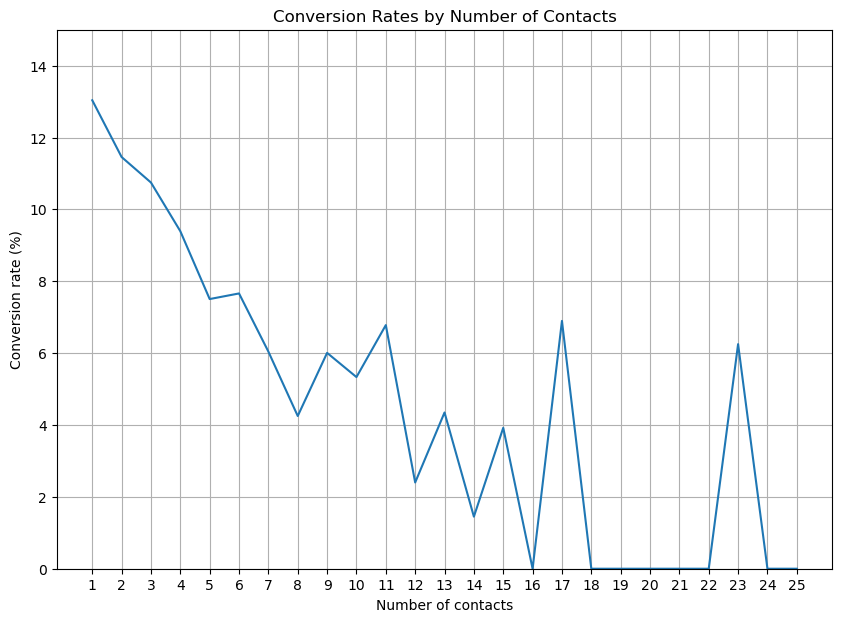

In [14]:
# visualize the conversion rate based on the number of contacts
ax = conversions_by_contacts[:25].plot(
    grid=True,
    figsize=(10, 7),
    xticks=conversions_by_contacts.index[:25],
    title='Conversion Rates by Number of Contacts'
)

ax.set_ylim([0, 15])

ax.set_xlabel('Number of contacts')
ax.set_ylabel('Conversion rate (%)')

plt.show()

### Conversion Rates by Age

In [15]:
# sum
pd.DataFrame(
    df.groupby(
        by='age'
    )['conversion'].sum()
)

,conversion
age,
17,2
18,12
19,20
20,23
21,29
...,...
91,0
92,3
94,0


In [16]:
# count
pd.DataFrame(
    df.groupby(
        by='age'
    )['conversion'].sum()
)

,conversion
age,
17,2
18,12
19,20
20,23
21,29
...,...
91,0
92,3
94,0


In [17]:
# the conversion percentage by age
conversions_by_age = df.groupby(
    by='age'
)['conversion'].sum() / df.groupby(
    by='age'
)['conversion'].count() * 100.0

In [18]:
# data frame of conversion rates by age
pd.DataFrame(conversions_by_age)

,conversion
age,
17,40.000000
18,42.857143
19,47.619048
20,35.384615
21,28.431373
...,...
91,0.000000
92,75.000000
94,0.000000


In [19]:
pd.DataFrame(conversions_by_age)

,conversion
age,
17,40.000000
18,42.857143
19,47.619048
20,35.384615
21,28.431373
...,...
91,0.000000
92,75.000000
94,0.000000


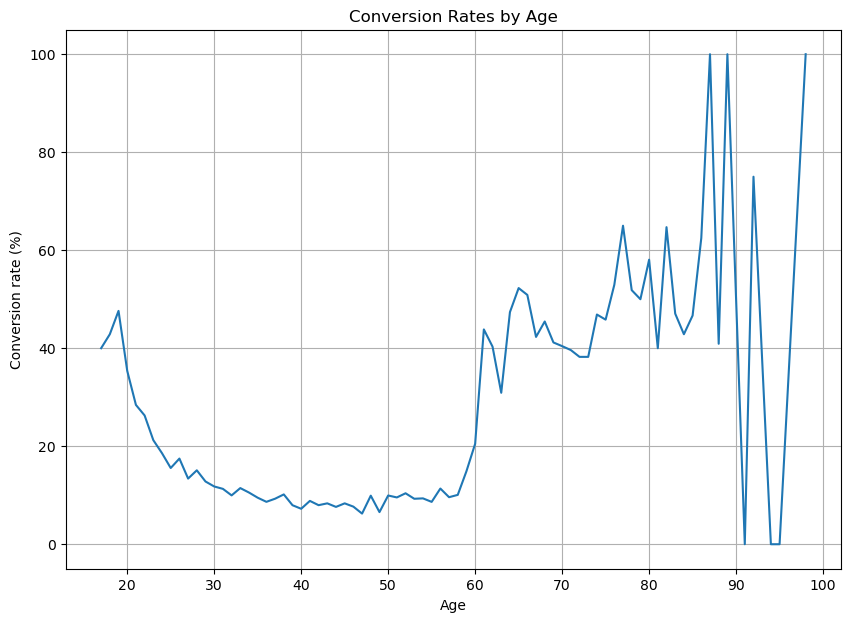

In [20]:
# visualization of the conversion rate by age
ax = conversions_by_age.plot(
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age'
)

ax.set_xlabel('Age')
ax.set_ylabel('Conversion rate (%)')

plt.show()

# this looks like there are outliers because certain ages have lower count sizes
# you can group them into categories

In [21]:
# convert the individual ages into Age Groups
# using the lambda function capability - it's like defining a function, but it doesn't have a name.
# https://www.geeksforgeeks.org/python-lambda-anonymous-functions-filter-map-reduce/
df['age_group'] = df['age'].apply(
    lambda x: '18 to 30' if x < 30 else '30 to 40' if x < 40 \
        else '40 to 50' if x < 50 else '50 to 60' if x < 60 \
        else '60 to 70' if x < 70 else '70 to >70'
)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,50 to 60
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,50 to 60
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,30 to 40
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,40 to 50
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,50 to 60


In [22]:
# sum of conversions by group
pd.DataFrame(
    df.groupby(
        by='age_group'
    )['conversion'].sum()
)

,conversion
age_group,
18 to 30,922
30 to 40,1715
40 to 50,834
50 to 60,697
60 to 70,251
70 to >70,221


In [23]:
# the number of people contacted in each age group
pd.DataFrame(
    df.groupby(
        by='age_group'
    )['conversion'].count()
)

,conversion
age_group,
18 to 30,5669
30 to 40,16938
40 to 50,10526
50 to 60,6862
60 to 70,724
70 to >70,469


In [24]:
# combine in a data frame
conversions_by_age_group = df.groupby(
    by='age_group'
)['conversion'].sum() / df.groupby(
    by='age_group'
)['conversion'].count() * 100.0

In [25]:
pd.DataFrame(conversions_by_age_group)

,conversion
age_group,
18 to 30,16.263891
30 to 40,10.125162
40 to 50,7.923238
50 to 60,10.157389
60 to 70,34.668508
70 to >70,47.121535


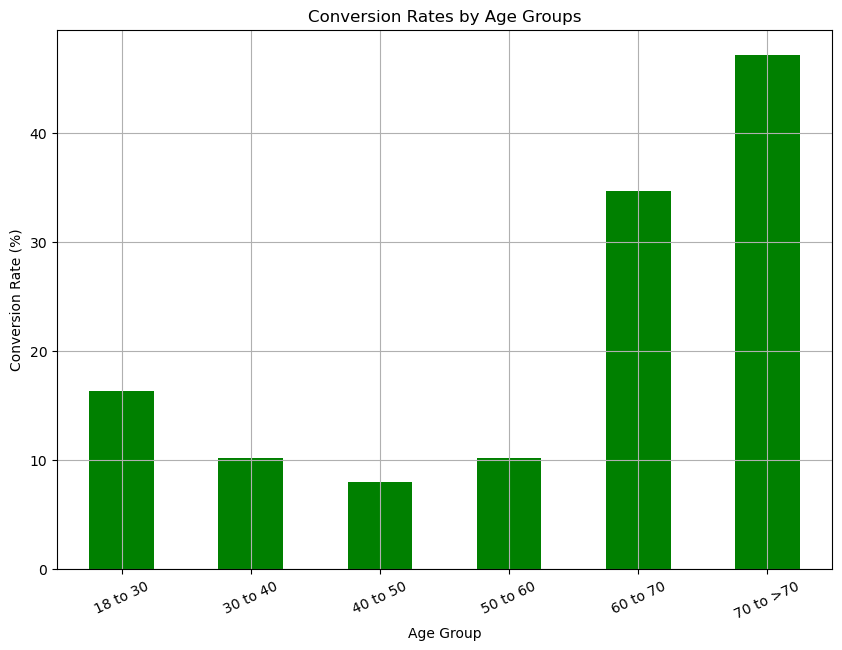

In [26]:
# conversion rates by age group
ax = conversions_by_age_group.loc[
    ['18 to 30', '30 to 40', '40 to 50', '50 to 60', '60 to 70', '70 to >70']
].plot(
    kind='bar',
    color='green',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age Groups'
)

ax.set_xlabel('Age Group')
ax.set_ylabel('Conversion Rate (%)')
plt.xticks(rotation = 25)

plt.show()

### Illustrate Conversions versus Non-Conversions by Groups

Marital Status

In [27]:
# python pivot table capability
# https://youtu.be/5yFox2cReTw
conversions_by_marital_status_df = pd.pivot_table(df, values='y', index='marital', columns='conversion', aggfunc=len)
conversions_by_marital_status_df
# pd.pivot_table - how many observations using the conversion column

conversion,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [28]:
# change the column headings
conversions_by_marital_status_df.columns = ['non_conversions', 'conversions']

In [29]:
conversions_by_marital_status_df

,non_conversions,conversions
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


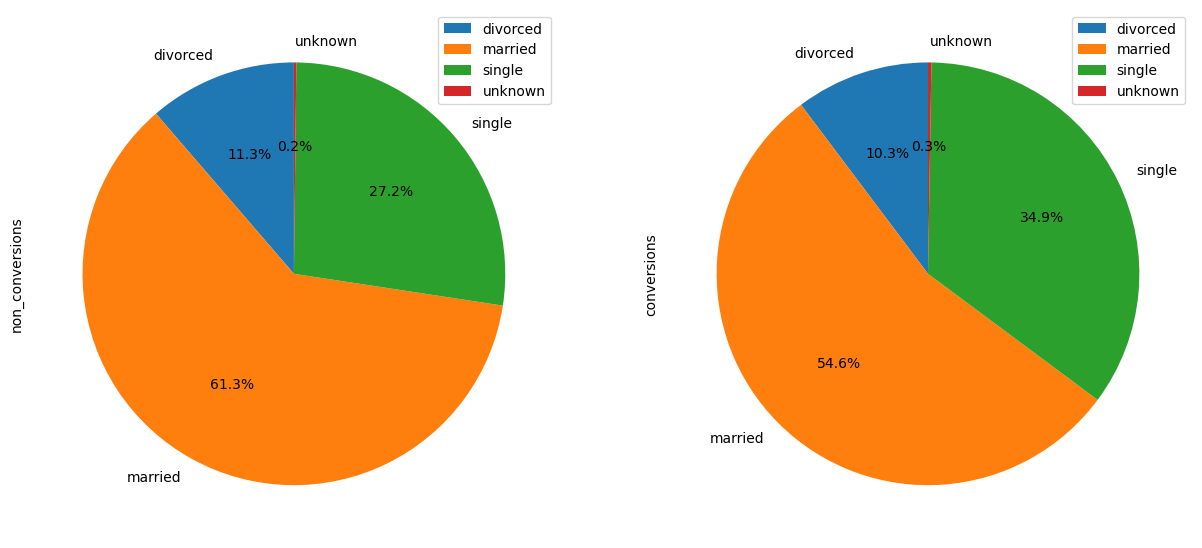

In [30]:
# pie charts by non-conversions vs conversions
conversions_by_marital_status_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

In [31]:
conversions_by_marital_status_df

,non_conversions,conversions
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [32]:
# new column of contacts
conversions_by_marital_status_df['tot_con'] = conversions_by_marital_status_df['non_conversions'] + conversions_by_marital_status_df['conversions']
conversions_by_marital_status_df

,non_conversions,conversions,tot_con
marital,,,
divorced,4136,476,4612
married,22396,2532,24928
single,9948,1620,11568
unknown,68,12,80


In [33]:
# new column of percentages 
conversions_by_marital_status_df['con_rate'] = conversions_by_marital_status_df['conversions'] / conversions_by_marital_status_df['tot_con'] * 100
conversions_by_marital_status_df

# perccentage conversion per contact per martial status group

,non_conversions,conversions,tot_con,con_rate
marital,,,,
divorced,4136,476,4612,10.320902
married,22396,2532,24928,10.157253
single,9948,1620,11568,14.004149
unknown,68,12,80,15.000000


In [34]:
# marital status column
conversions_by_marital_status_df['marital'] = conversions_by_marital_status_df.index
conversions_by_marital_status_df


,non_conversions,conversions,tot_con,con_rate,marital
marital,,,,,
divorced,4136,476,4612,10.320902,divorced
married,22396,2532,24928,10.157253,married
single,9948,1620,11568,14.004149,single
unknown,68,12,80,15.000000,unknown


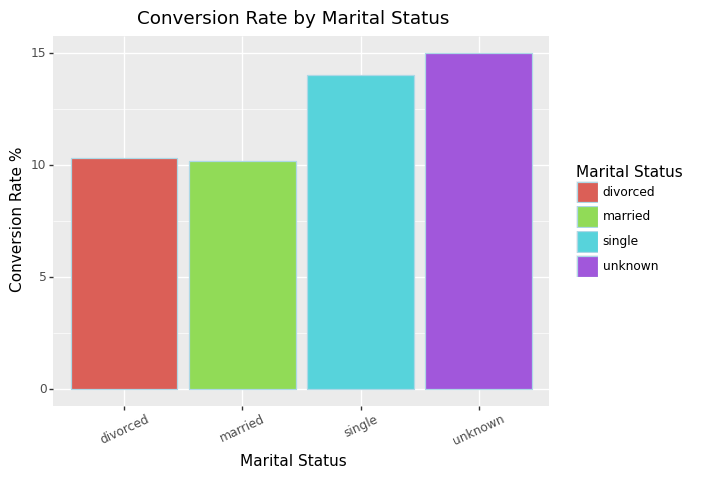

<ggplot: (342301485)>

In [35]:
# conversion rates by marital status
g = (p9.ggplot(conversions_by_marital_status_df, p9.aes(x='marital' , y='con_rate', fill = 'marital'))+
    p9.geom_bar(stat = "identity", color='lightblue')+
    p9.labs(x="Marital Status", y = "Conversion Rate %", title="Conversion Rate by Marital Status")+
    p9.theme(axis_text_x = p9.element_text(angle=25)))
g + p9.labs(fill = "Marital Status")

# stat = identity, this means it pulls straight from the data - doesn't have to compute

Education Status

In [36]:
# pivot on the education status field
conversions_by_education_df = pd.pivot_table(df, values='y', index='education', columns='conversion', aggfunc=len)
conversions_by_education_df.columns = ['non_conversions', 'conversions']
conversions_by_education_df

,non_conversions,conversions
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


In [37]:
# column of contacts
conversions_by_education_df['tot_con'] = conversions_by_education_df['non_conversions'] + conversions_by_education_df['conversions']
# column of percentages 
conversions_by_education_df['con_rate'] = conversions_by_education_df['conversions'] / conversions_by_education_df['tot_con'] * 100
# column with marital status
conversions_by_education_df['education'] = conversions_by_education_df.index
conversions_by_education_df

,non_conversions,conversions,tot_con,con_rate,education
education,,,,,
basic.4y,3748,428,4176,10.249042,basic.4y
basic.6y,2104,188,2292,8.202443,basic.6y
basic.9y,5572,473,6045,7.824648,basic.9y
high.school,8484,1031,9515,10.835523,high.school
illiterate,14,4,18,22.222222,illiterate
professional.course,4648,595,5243,11.348465,professional.course
university.degree,10498,1670,12168,13.724523,university.degree
unknown,1480,251,1731,14.500289,unknown


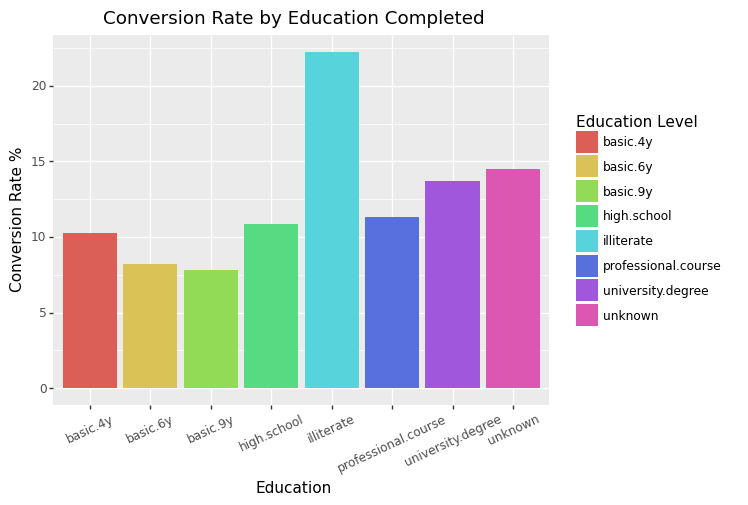

<ggplot: (342881609)>

In [38]:
# conversion rates by marital status
g = (p9.ggplot(conversions_by_education_df, p9.aes(x='education' , y='con_rate', fill = 'education'))+
    p9.geom_bar(stat = "identity")+
    p9.labs(x="Education", y = "Conversion Rate %", title="Conversion Rate by Education Completed")+
    p9.theme(axis_text_x = p9.element_text(angle=25)))
g + p9.labs(fill = "Education Level")

# gm_text to add the # of calls on top of the bar

### Call Length and the Relationship to Conversion

This section breaks down the conversion rate by the length of the call with the customer.

In [39]:
df.groupby('conversion')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
conversion,,,,,,,,
0,36548.0,220.844807,207.096293,0.0,95.0,163.5,279.00,4918.0
1,4640.0,553.191164,401.171871,37.0,253.0,449.0,741.25,4199.0


In [40]:
# convert the duration to minutes, rounding to 0
df['dur_min'] = round(df['duration'] / 60, 0)
df['dur_min']

0        4.0
1        2.0
2        4.0
3        3.0
4        5.0
        ... 
41183    6.0
41184    6.0
41185    3.0
41186    7.0
41187    4.0
Name: dur_min, Length: 41188, dtype: float64

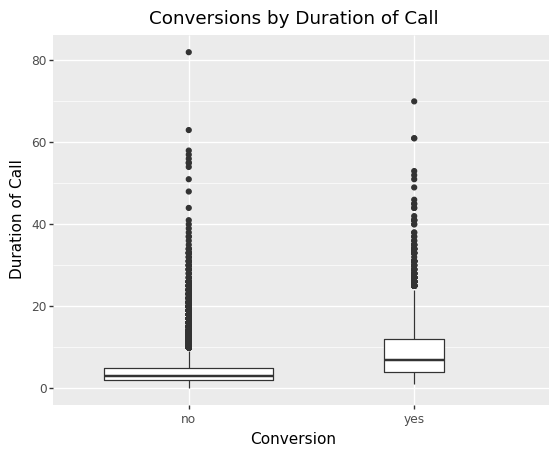

<ggplot: (343185701)>

In [41]:
g = (p9.ggplot(df, p9.aes(x='y' , y='dur_min'))+
    p9.geom_boxplot(varwidth = True)+
    p9.labs(x="Conversion", y = "Duration of Call", title="Conversions by Duration of Call"))

g


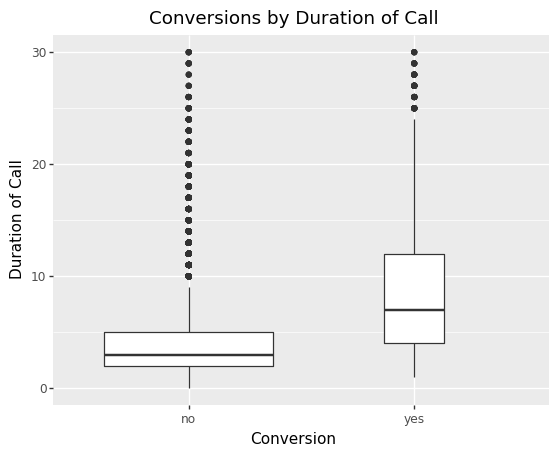

<ggplot: (343208921)>

In [42]:
# limiting the y-axis
g = (p9.ggplot(df, p9.aes(x='y' , y='dur_min'))+
    p9.geom_boxplot(varwidth = True)+
    p9.ylim(0,30)+
    p9.labs(x="Conversion", y = "Duration of Call", title="Conversions by Duration of Call"))

g

### Track the campaign over time

In [43]:
# the number of people contacted by month
calls_by_month = pd.DataFrame(
    df.groupby(
        by='month'
    )['conversion'].count()
)
calls_by_month

# The categorical month variable is organized alphabetically

,conversion
month,
apr,2632
aug,6178
dec,182
jul,7174
jun,5318
mar,546
may,13769
nov,4101
oct,718


In [44]:
# reorder the months in a standard monthly order instead of alphabetical
# changing the index to a named column
calls_by_month['Month'] = calls_by_month.index
calls_by_month

,conversion,Month
month,,
apr,2632,apr
aug,6178,aug
dec,182,dec
jul,7174,jul
jun,5318,jun
mar,546,mar
may,13769,may
nov,4101,nov
oct,718,oct


In [45]:
months_categories = ["jan", "feb", "mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]
calls_by_month["Month"] = pd.Categorical(calls_by_month["Month"], categories = months_categories)
calls_by_month.sort_values(by = "Month")

# converting months to categories and ordering it in the list sequence

,conversion,Month
month,,
mar,546,mar
apr,2632,apr
may,13769,may
jun,5318,jun
jul,7174,jul
aug,6178,aug
sep,570,sep
oct,718,oct
nov,4101,nov


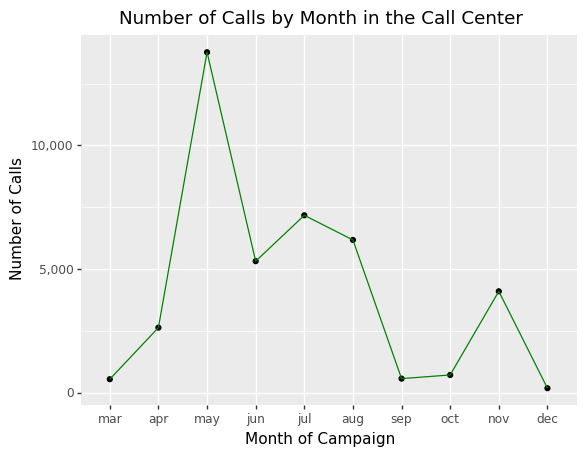

<ggplot: (343290357)>

In [46]:
# number of calls over time in the campaign
g = (p9.ggplot(calls_by_month, p9.aes(x='Month' , y='conversion', group='conversion'))+
    p9.geom_point()+
    p9.geom_line(group=1, color='green')+
    p9.scales.scale_y_continuous(labels=mizani.formatters.comma_format(digits=0))+
    p9.labs(x="Month of Campaign", y = "Number of Calls", title="Number of Calls by Month in the Call Center"))

g